In [1]:
import random
from rich.progress import track
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random.seed(0)

In [9]:
df = pd.read_parquet("../data/tables/test_sim.parquet")
df.head()

,20231220-080-01_0155-0161.mid,20231220-080-02_0257-0263.mid,20231220-080-03_0329-0335.mid,20231220-080-04_0029-0035.mid,20231220-080-05_0029-0035.mid,20231220-080-06_0029-0035.mid,20231220-080-07_0071-0077.mid,20231220-080-08_0101-0107.mid,20231227-080-01_0005-0011.mid,20231227-080-02_0017-0023.mid,...,20240511-088-03_0354-0359.mid,baba-060-02_0005-0011.mid,bbbb-060-01_0005-0011.mid,c4v100-060-03_0000-0005.mid,c4v97-060-03_0005-0011.mid,cascas-060-02_0000-0005.mid,cccc-060-01_0000-0005.mid,leadtest-060-03_0000-0005.mid,trailtest-060-03_0005-0011.mid,transpose-060-01_0000-0005.mid
20231220-080-01_0155-0161.mid,"{'sim': 1.0, 'transformations': {'shift': 5, '...","{'sim': 0.87585, 'transformations': {'shift': ...","{'sim': 0.7924, 'transformations': {'shift': 2...","{'sim': 0.77764, 'transformations': {'shift': ...","{'sim': 0.82046, 'transformations': {'shift': ...","{'sim': 0.79969, 'transformations': {'shift': ...","{'sim': 0.93657, 'transformations': {'shift': ...","{'sim': 0.95168, 'transformations': {'shift': ...","{'sim': 0.75622, 'transformations': {'shift': ...","{'sim': 0.71168, 'transformations': {'shift': ...",...,"{'sim': 0.7626, 'transformations': {'shift': 7...","{'sim': 0.70457, 'transformations': {'shift': ...","{'sim': 0.73816, 'transformations': {'shift': ...","{'sim': 0.73816, 'transformations': {'shift': ...","{'sim': 0.73816, 'transformations': {'shift': ...","{'sim': 0.70457, 'transformations': {'shift': ...","{'sim': 0.73816, 'transformations': {'shift': ...","{'sim': 0.73816, 'transformations': {'shift': ...","{'sim': 0.76895, 'transformations': {'shift': ...","{'sim': 0.63236, 'transformations': {'shift': ..."
20231220-080-02_0257-0263.mid,"{'sim': 0.87585, 'transformations': {'shift': ...","{'sim': 1.0, 'transformations': {'shift': 3, '...","{'sim': 0.75377, 'transformations': {'shift': ...","{'sim': 0.77511, 'transformations': {'shift': ...","{'sim': 0.81023, 'transformations': {'shift': ...","{'sim': 0.78791, 'transformations': {'shift': ...","{'sim': 0.97162, 'transformations': {'shift': ...","{'sim': 0.93028, 'transformations': {'shift': ...","{'sim': 0.75799, 'transformations': {'shift': ...","{'sim': 0.87028, 'transformations': {'shift': ...",...,"{'sim': 0.73123, 'transformations': {'shift': ...","{'sim': 0.62003, 'transformations': {'shift': ...","{'sim': 0.77926, 'transformations': {'shift': ...","{'sim': 0.77926, 'transformations': {'shift': ...","{'sim': 0.77926, 'transformations': {'shift': ...","{'sim': 0.62003, 'transformations': {'shift': ...","{'sim': 0.77926, 'transformations': {'shift': ...","{'sim': 0.77926, 'transformations': {'shift': ...","{'sim': 0.72483, 'transformations': {'shift': ...","{'sim': 0.60881, 'transformations': {'shift': ..."
20231220-080-03_0329-0335.mid,"{'sim': 0.7924, 'transformations': {'shift': 3...","{'sim': 0.75377, 'transformations': {'shift': ...","{'sim': 1.0, 'transformations': {'shift': 6, '...","{'sim': 0.87558, 'transformations': {'shift': ...","{'sim': 0.72972, 'transformations': {'shift': ...","{'sim': 0.88031, 'transformations': {'shift': ...","{'sim': 0.70477, 'transformations': {'shift': ...","{'sim': 0.79401, 'transformations': {'shift': ...","{'sim': 0.83531, 'transformations': {'shift': ...","{'sim': 0.63411, 'transformations': {'shift': ...",...,"{'sim': 0.87921, 'transformations': {'shift': ...","{'sim': 0.91132, 'transformations': {'shift': ...","{'sim': 0.64556, 'transformations': {'shift': ...","{'sim': 0.64556, 'transformations': {'shift': ...","{'sim': 0.64556, 'transformations': {'shift': ...","{'sim': 0.91132, 'transformations': {'shift': ...","{'sim': 0.64556, 'transformations': {'shift': ...","{'sim': 0.64556, 'transformations': {'shift': ...","{'sim': 0.87893, 'transformations': {'shift': ...","{'sim': 0.6547, 'transformations': {'shift': 3..."
20231220-080-04_0029-0035.mid,"{'sim': 0.77764, 'transformations': {'shift': ...","{'sim': 0.77511, 'transformations': {'shift': ...","{'sim': 0.87558, 'transformations': {'shift': ...","{'s

In [5]:
df.index.tolist()

['20231220-080-01_0000-0005.mid',
 '20231220-080-01_0005-0011.mid',
 '20231220-080-01_0011-0017.mid',
 '20231220-080-01_0017-0023.mid',
 '20231220-080-01_0023-0029.mid',
 '20231220-080-01_0029-0035.mid',
 '20231220-080-01_0035-0041.mid',
 '20231220-080-01_0041-0047.mid',
 '20231220-080-01_0047-0053.mid',
 '20231220-080-01_0053-0059.mid',
 '20231220-080-01_0059-0065.mid',
 '20231220-080-01_0065-0071.mid',
 '20231220-080-01_0071-0077.mid',
 '20231220-080-01_0077-0083.mid',
 '20231220-080-01_0083-0089.mid',
 '20231220-080-01_0089-0095.mid',
 '20231220-080-01_0095-0101.mid',
 '20231220-080-01_0101-0107.mid',
 '20231220-080-01_0107-0113.mid',
 '20231220-080-01_0113-0119.mid',
 '20231220-080-01_0119-0125.mid',
 '20231220-080-01_0125-0131.mid',
 '20231220-080-01_0131-0137.mid',
 '20231220-080-01_0137-0143.mid',
 '20231220-080-01_0143-0149.mid',
 '20231220-080-01_0149-0155.mid',
 '20231220-080-01_0155-0161.mid',
 '20231220-080-01_0161-0167.mid',
 '20231220-080-01_0167-0173.mid',
 '20231220-080

In [2]:


names = ["x", "y", "z"]

value_tuple = ("a", 0.5, "b", 0.4)

# Number of rows you want in the DataFrame
num_rows = 3

# Create a DataFrame with `num_rows` rows, each initialized with `value_tuple`
df = pd.DataFrame(
    [value_tuple] * len(names),
    index=names,
    columns=["Value1", "Number1", "Value2", "Number2"],
)

print(df)

  Value1  Number1 Value2  Number2
x      a      0.5      b      0.4
y      a      0.5      b      0.4
z      a      0.5      b      0.4


In [3]:
n = 2
(["a", 0.5] * 2) * n

['a', 0.5, 'a', 0.5, 'a', 0.5, 'a', 0.5]

In [4]:
probs = [
    1 / 5,  # same
    1 / 6,  # next 1
    1 / 6,  # prev 1
    1 / 10,  # next 2
    1 / 10,  # prev 2
    0.0533,  # diff 1
    0.0533,  # diff 2
    0.0533,  # diff 3
    0.0533,  # diff 4
]
probs.append(1 - sum(probs))  # add diff 5

cprobs = np.cumsum(probs)

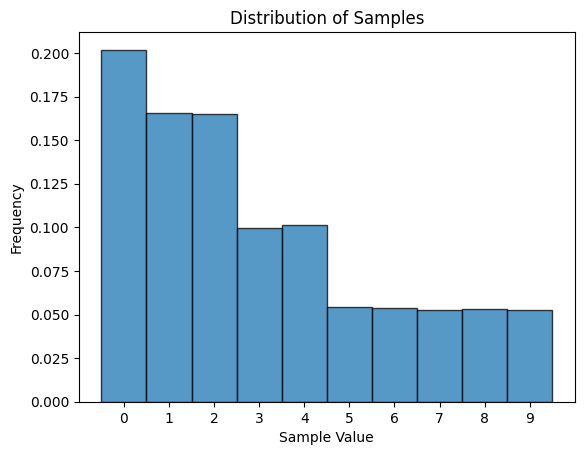

In [5]:
samples = np.random.choice(np.arange(len(probs)), size=100000, p=probs)

# Plotting the samples
plt.hist(
    samples,
    bins=np.arange(len(probs) + 1) - 0.5,
    density=True,
    alpha=0.75,
    edgecolor="black",
)
plt.xticks(np.arange(len(probs)))
plt.title("Distribution of Samples")
plt.xlabel("Sample Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
feather_df = pd.read_feather("../data/outputs/careful_pitch_histogram.feather")
feather_df.to_parquet("../data/outputs/careful-pitch_histogram.parquet")

In [12]:
feather_df.head()

,20231220-80-01_0000-0008.mid,20231220-80-01_0008-0016.mid,20231220-80-01_0016-0024.mid,20231220-80-01_0024-0032.mid,20231220-80-01_0032-0040.mid,20231220-80-01_0040-0048.mid,20231220-80-01_0048-0056.mid,20231220-80-01_0056-0064.mid,20231220-80-01_0064-0072.mid,20231220-80-01_0072-0080.mid,...,20240227-76-05_0872-0880.mid,20240227-76-05_0880-0888.mid,20240227-76-05_0888-0896.mid,20240227-76-05_0896-0904.mid,20240227-76-05_0904-0912.mid,20240227-76-05_0912-0920.mid,20240227-76-05_0920-0928.mid,20240227-76-05_0928-0936.mid,20240227-76-05_0936-0944.mid,20240227-76-05_0944-0952.mid
20231220-80-01_0000-0008.mid,"{'sim': 1.0, 'transformations': {'shift': 0, '...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 0.9965457582448798, 'transformations':...","{'sim': 0.9899494936611666, 'transformations':...","{'sim': 0.9778024140774096, 'transformations':...","{'sim': 0.943879807448539, 'transformations': ...","{'sim': 0.9463204468147676, 'transformations':...","{'sim': 0.8131156281817418, 'transformations':...",...,"{'sim': 0.8534631283962076, 'transformations':...","{'sim': 0.7576029726386662, 'transformations':...","{'sim': 0.7813903150950317, 'transformations':...","{'sim': 0.642857142857143, 'transformations': ...","{'sim': 0.7321293603831283, 'transformations':...","{'sim': 0.8626157662974291, 'transformations':...","{'sim': 0.799456337008225, 'transformations': ...","{'sim': 0.8025343000034281, 'transformations':...","{'sim': 0.7533507240540993, 'transformations':...","{'sim': 0.7931747686306172, 'transformations':..."
20231220-80-01_0008-0016.mid,"{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0, 'transformations': {'shift': 0, '...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 0.9965457582448798, 'transformations':...","{'sim': 0.9899494936611666, 'transformations':...","{'sim': 0.9778024140774096, 'transformations':...","{'sim': 0.943879807448539, 'transformations': ...","{'sim': 0.9463204468147676, 'transformations':...","{'sim': 0.8131156281817418, 'transformations':...",...,"{'sim': 0.8534631283962076, 'transformations':...","{'sim': 0.7576029726386662, 'transformations':...","{'sim': 0.7813903150950317, 'transformations':...","{'sim': 0.642857142857143, 'transformations': ...","{'sim': 0.7321293603831283, 'transformations':...","{'sim': 0.8626157662974291, 'transformations':...","{'sim': 0.799456337008225, 'transformations': ...","{'sim': 0.8025343000034281, 'transformations':...","{'sim': 0.7533507240540993, 'transformations':...","{'sim': 0.7931747686306172, 'transformations':..."
20231220-80-01_0016-0024.mid,"{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0, 'transformations': {'shift': 0, '...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 0.9965457582448798, 'transformations':...","{'sim': 0.9899494936611666, 'transformations':...","{'sim': 0.9778024140774096, 'transformations':...","{'sim': 0.943879807448539, 'transformations': ...","{'sim': 0.9463204468147676, 'transformations':...","{'sim': 0.8131156281817418, 'transformations':...",...,"{'sim': 0.8534631283962076, 'transformations':...","{'sim': 0.7576029726386662, 'transformations':...","{'sim': 0.7813903150950317, 'transformations':...","{'sim': 0.642857142857143, 'transformations': ...","{'sim': 0.7321293603831283, 'transformations':...","{'sim': 0.8626157662974291, 'transformations':...","{'sim': 0.799456337008225, 'transformations': ...","{'sim': 0.8025343000034281, 'transformations':...","{'sim': 0.7533507240540993, 'transformations':...","{'sim': 0.7931747686306172, 'transformations':..."
20231220-80-01_0024-0032.mid,"{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.0000000000000002, 'transformations':...","{'sim': 1.

In [19]:
row = feather_df.loc["20231220-80-01_0000-0008.mid"]
sorted_row = row.sort_values(key=lambda x: x.str["sim"], ascending=False)  # type: ignore
for x, y in sorted_row.items():
    print(f"{x} --> {y}")

20231220-80-01_0008-0016.mid --> {'sim': 1.0000000000000002, 'transformations': {'shift': 0, 'trans': 0.0, 'transpose': None}}
20231220-80-01_0016-0024.mid --> {'sim': 1.0000000000000002, 'transformations': {'shift': 0, 'trans': 0.0, 'transpose': None}}
20231220-80-01_0024-0032.mid --> {'sim': 1.0000000000000002, 'transformations': {'shift': 0, 'trans': 0.0, 'transpose': None}}
20231220-80-01_0000-0008.mid --> {'sim': 1.0, 'transformations': {'shift': 0, 'trans': None, 'transpose': 0.0}}
20231220-80-01_0032-0040.mid --> {'sim': 0.9965457582448798, 'transformations': {'shift': 0, 'trans': 0.0, 'transpose': None}}
20231220-80-01_0040-0048.mid --> {'sim': 0.9899494936611666, 'transformations': {'shift': 0, 'trans': 0.0, 'transpose': None}}
20240124-64-04_0448-0456.mid --> {'sim': 0.9852117548196746, 'transformations': {'shift': 0, 'trans': 7.0, 'transpose': None}}
20240124-64-04_0352-0360.mid --> {'sim': 0.9834450564746756, 'transformations': {'shift': 0, 'trans': 7.0, 'transpose': None}}

In [6]:
import json

with open("../data/outputs/all-fourbar_properties.json", "r") as f:
    properties = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../data/outputs/all-fourbar_properties.json'

In [7]:
big_table = pd.read_parquet("../data/outputs/all-fourbar.parquet")
big_table[:5]

,loop,sim-1,prev 1,sim-2,next 1,sim-3,prev 2,sim-4,next 2,sim-5,diff 1,sim-6,diff 2,sim-7,diff 3,sim-8,diff 4,sim-9,diff 5,sim-10
rows,,,,,,,,,,,,,,,,,,,,
20240124-064-02_0585-0600_n00.mid,,-1.0,20240124-064-02_0570-0585_n00.mid,-1.0,20240124-064-02_0600-0615_n00.mid,-1.0,20240124-064-02_0555-0570_n00.mid,-1.0,20240124-064-02_0615-0630_n00.mid,-1.0,20240213-100-04_0009-0019_d01.mid,0.978230,20231220-080-03_0300-0312_u04.mid,0.964215,20231220-080-03_0312-0324_u04.mid,0.961177,20231220-080-03_0288-0300_u04.mid,0.961291,20240213-100-04_0000-0009_d01.mid,0.971993
20240123-070-04_0109-0123_u06.mid,,-1.0,20240123-070-04_0096-0109_u06.mid,-1.0,20240123-070-04_0123-0137_u06.mid,-1.0,20240123-070-04_0082-0095_u06.mid,-1.0,20240123-070-04_0137-0150_u06.mid,-1.0,20231228-072-01_0426-0440_u04.mid,0.969318,20240213-100-06_0556-0566_u04.mid,0.968763,20240124-064-01_0135-0150_d03.mid,0.959238,20240213-100-06_0566-0576_u04.mid,0.966461,20240213-100-06_0585-0595_u04.mid,0.967232
20240122-055-05_0139-0157_d01.mid,,-1.0,20240122-055-05_0122-0139_d01.mid,-1.0,20240122-055-05_0157-0174_d01.mid,-1.0,20240122-055-05_0104-0122_d01.mid,-1.0,20240122-055-05_0174-0192_d01.mid,-1.0,20240227-076-03_0480-0492_d06.mid,0.989772,20240122-055-05_0122-0139_d01.mid,0.987672,20240122-055-05_0192-0209_d01.mid,0.991189,20240227-076-03_0480-0492_u06.mid,0.989772,20240122-055-05_0157-0174_d01.mid,0.998327
20240213-100-05_0297-0307_d02.mid,,-1.0,20240213-100-05_0288-0297_d02.mid,-1.0,20240213-100-05_0307-0316_d02.mid,-1.0,20240213-100-05_0278-0288_d02.mid,-1.0,20240213-100-05_0316-0326_d02.mid,-1.0,20240123-070-04_0096-0109_n00.mid,0.982141,20240123-070-04_0137-0150_n00.mid,0.981052,20240213-100-05_0240-0249_d02.mid,0.978996,20240227-076-05_0492-0505_d02.mid,0.976411,20231220-080-03_0000-0012_u03.mid,0.979731
20240121-070-03_0000-0013_d01.mid,,-1.0,None,-1.0,20240121-070-03_0013-0027_d01.mid,-1.0,20240213-100-05_0278-0288_d02.mid,-1.0,20240121-070-03_0027-0041_d01.mid,-1.0,20240121-070-03_0041-0054_d01.mid,0.999235,20240121-070-03_0068-0082_d01.mid,0.996785,20240213-100-02_1228-1238_u01.mid,0.991972,20240121-070-03_0054-0068_d01.mid,0.997855,20240121-070-03_0027-0041_d01.mid,0.992460


In [8]:
big_table.index = properties.keys()
big_table.index.name = "rows"
big_table[:4]

,loop,sim-1,prev 1,sim-2,next 1,sim-3,prev 2,sim-4,next 2,sim-5,diff 1,sim-6,diff 2,sim-7,diff 3,sim-8,diff 4,sim-9,diff 5,sim-10
rows,,,,,,,,,,,,,,,,,,,,
20240124-064-02_0585-0600_n00.mid,,-1.0,20240124-064-02_0570-0585_n00.mid,-1.0,20240124-064-02_0600-0615_n00.mid,-1.0,20240124-064-02_0555-0570_n00.mid,-1.0,20240124-064-02_0615-0630_n00.mid,-1.0,20240213-100-04_0009-0019_d01.mid,0.978230,20231220-080-03_0300-0312_u04.mid,0.964215,20231220-080-03_0312-0324_u04.mid,0.961177,20231220-080-03_0288-0300_u04.mid,0.961291,20240213-100-04_0000-0009_d01.mid,0.971993
20240123-070-04_0109-0123_u06.mid,,-1.0,20240123-070-04_0096-0109_u06.mid,-1.0,20240123-070-04_0123-0137_u06.mid,-1.0,20240123-070-04_0082-0095_u06.mid,-1.0,20240123-070-04_0137-0150_u06.mid,-1.0,20231228-072-01_0426-0440_u04.mid,0.969318,20240213-100-06_0556-0566_u04.mid,0.968763,20240124-064-01_0135-0150_d03.mid,0.959238,20240213-100-06_0566-0576_u04.mid,0.966461,20240213-100-06_0585-0595_u04.mid,0.967232
20240122-055-05_0139-0157_d01.mid,,-1.0,20240122-055-05_0122-0139_d01.mid,-1.0,20240122-055-05_0157-0174_d01.mid,-1.0,20240122-055-05_0104-0122_d01.mid,-1.0,20240122-055-05_0174-0192_d01.mid,-1.0,20240227-076-03_0480-0492_d06.mid,0.989772,20240122-055-05_0122-0139_d01.mid,0.987672,20240122-055-05_0192-0209_d01.mid,0.991189,20240227-076-03_0480-0492_u06.mid,0.989772,20240122-055-05_0157-0174_d01.mid,0.998327
20240213-100-05_0297-0307_d02.mid,,-1.0,20240213-100-05_0288-0297_d02.mid,-1.0,20240213-100-05_0307-0316_d02.mid,-1.0,20240213-100-05_0278-0288_d02.mid,-1.0,20240213-100-05_0316-0326_d02.mid,-1.0,20240123-070-04_0096-0109_n00.mid,0.982141,20240123-070-04_0137-0150_n00.mid,0.981052,20240213-100-05_0240-0249_d02.mid,0.978996,20240227-076-05_0492-0505_d02.mid,0.976411,20231220-080-03_0000-0012_u03.mid,0.979731


In [10]:
big_table.loc["20231220-080-03_0312-0324_u04.mid"]

loop                                       
sim-1                                  -1.0
prev 1    20231220-080-03_0300-0312_u04.mid
sim-2                                  -1.0
next 1    20231220-080-03_0324-0336_u04.mid
sim-3                                  -1.0
prev 2    20231220-080-03_0288-0300_u04.mid
sim-4                                  -1.0
next 2    20231220-080-03_0336-0348_u04.mid
sim-5                                  -1.0
diff 1    20231220-080-03_0276-0288_u04.mid
sim-6                              0.990476
diff 2    20231220-080-03_0288-0300_u04.mid
sim-7                              0.993557
diff 3    20231220-080-03_0324-0336_u04.mid
sim-8                              0.996365
diff 4    20240117-064-05_0015-0030_u01.mid
sim-9                              0.982134
diff 5    20231220-080-03_0300-0312_u04.mid
sim-10                              0.99785
Name: 20231220-080-03_0312-0324_u04.mid, dtype: object

In [8]:
column_indices = range(0, 20, 2)
columns = big_table.columns.tolist()
for i, p in zip(column_indices, cprobs):
    print(f"{big_table.columns.values[i]} -> {p:.05f}")
    columns[i] = f"{p:.05f}"
big_table.columns = columns
big_table[:4]

0.2-1 -> 0.20000
0.16666666666666666-2 -> 0.36667
0.16666666666666666-3 -> 0.53333
0.1-4 -> 0.63333
0.1-5 -> 0.73333
0.0533-6 -> 0.78663
0.0533-7 -> 0.83993
0.0533-8 -> 0.89323
0.0533-9 -> 0.94653
0.05346666666666666-10 -> 1.00000


,0.20000,sim-1,0.36667,sim-2,0.53333,sim-3,0.63333,sim-4,0.73333,sim-5,0.78663,sim-6,0.83993,sim-7,0.89323,sim-8,0.94653,sim-9,1.00000,sim-10
rows,,,,,,,,,,,,,,,,,,,,
20240124-064-02_0585-0600_n00.mid,20240124-064-02_0585-0600_n00.mid,1.0,20240124-064-02_0570-0585_n00.mid,0.891676,20240124-064-02_0570-0585_d02.mid,0.713828,20240124-064-02_0570-0585_d04.mid,0.708955,20240124-064-02_0600-0615_n00.mid,0.760091,20240213-100-04_0009-0019_d01.mid,0.978230,20231220-080-03_0300-0312_u04.mid,0.964215,20231220-080-03_0312-0324_u04.mid,0.961177,20231220-080-03_0288-0300_u04.mid,0.961291,20240213-100-04_0000-0009_d01.mid,0.971993
20240123-070-04_0109-0123_u06.mid,20240123-070-04_0109-0123_u06.mid,1.0,20240123-070-04_0109-0123_d06.mid,1.000000,20240123-070-04_0123-0137_u06.mid,0.950766,20240123-070-04_0123-0137_d06.mid,0.950766,20240123-070-04_0096-0109_u06.mid,0.817166,20231228-072-01_0426-0440_u04.mid,0.969318,20240213-100-06_0556-0566_u04.mid,0.968763,20240124-064-01_0135-0150_d03.mid,0.959238,20240213-100-06_0566-0576_u04.mid,0.966461,20240213-100-06_0585-0595_u04.mid,0.967232
20240122-055-05_0139-0157_d01.mid,20240122-055-05_0139-0157_d01.mid,1.0,20240122-055-05_0157-0174_u04.mid,0.777904,20240122-055-05_0157-0174_d01.mid,0.998327,20240122-055-05_0139-0157_u04.mid,0.775581,20240122-055-05_0122-0139_d01.mid,0.987672,20240122-055-05_0192-0209_d01.mid,0.991189,20240227-076-03_0480-0492_d06.mid,0.989772,20240122-055-05_0087-0104_d01.mid,0.986605,20240227-076-03_0480-0492_u06.mid,0.989772,20240122-055-05_0226-0244_d01.mid,0.987184
20240213-100-05_0297-0307_d02.mid,20240213-100-05_0297-0307_d02.mid,1.0,20240213-100-05_0307-0316_d02.mid,0.953235,20240213-100-05_0307-0316_u05.mid,0.679078,20240213-100-05_0288-0297_d02.mid,0.972683,20240213-100-05_0288-0297_u05.mid,0.667622,20240123-070-04_0096-0109_n00.mid,0.982141,20240123-070-04_0137-0150_n00.mid,0.981052,20240213-100-05_0240-0249_d02.mid,0.978996,20240227-076-05_0492-0505_d02.mid,0.976411,20231220-080-03_0000-0012_u03.mid,0.979731


In [9]:
def get_prev(filename):
    i_name, i_seg_num, i_shift = filename.split("_")
    i_seg_start, i_seg_end = i_seg_num.split("-")
    delta = int(i_seg_end) - int(i_seg_start)

    if int(i_seg_start) == 0:
        return None

    prev_file = f"{i_name}_{int(i_seg_start) - delta:04d}-{i_seg_start}_{i_shift}"

    for key in properties.keys():
        k_name, k_seg_num, k_shift = key.split("_")
        k_seg_start, k_seg_end = k_seg_num.split("-")

        if (
            k_name == i_name
            and k_shift == i_shift
            and abs(int(k_seg_end) - int(i_seg_start)) <= 2
        ):
            prev_file = key

    return prev_file


def get_next(filename):
    i_name, i_seg_num, i_shift = filename.split("_")
    i_seg_start, i_seg_end = i_seg_num.split("-")
    delta = int(i_seg_end) - int(i_seg_start)

    next_file = f"{i_name}_{i_seg_end}-{int(i_seg_end) + delta:04d}_{i_shift}"
    if next_file not in properties.keys():
        next_file = None
        for key in properties.keys():
            k_name, k_seg_num, k_shift = key.split("_")
            k_seg_start, k_seg_end = k_seg_num.split("-")

            if (
                k_name == i_name
                and k_shift == i_shift
                and abs(int(k_seg_start) - int(i_seg_end)) <= 2
            ):
                next_file = key

    return next_file

In [10]:
repl_indices = [2, 4, 6, 8]  # first 5 files

for name in track(big_table.index):
    i = big_table.index.get_loc(name)
    # get prev file(s)
    prev_file = get_prev(name)
    if prev_file:
        p_start = prev_file.split("_")[1].split("-")[0]
        if int(p_start) != 0:
            prv2_file = get_prev(prev_file)

    # get next file(s)
    next_file = get_next(name)
    if next_file:
        nxt2_file = get_next(next_file)

    names = [prev_file, next_file, prv2_file, nxt2_file]

    for j, n in zip(repl_indices, names):
        big_table.iat[i, j] = n

Output()

In [26]:
for i in range(10):
    if i % 2:
        continue
    print(i)

0
2
4
6
8


In [11]:
big_table[:4]

,0.20000,sim-1,0.36667,sim-2,0.53333,sim-3,0.63333,sim-4,0.73333,sim-5,0.78663,sim-6,0.83993,sim-7,0.89323,sim-8,0.94653,sim-9,1.00000,sim-10
rows,,,,,,,,,,,,,,,,,,,,
20240124-064-02_0585-0600_n00.mid,20240124-064-02_0585-0600_n00.mid,1.0,20240124-064-02_0570-0585_n00.mid,0.891676,20240124-064-02_0600-0615_n00.mid,0.713828,20240124-064-02_0555-0570_n00.mid,0.708955,20240124-064-02_0615-0630_n00.mid,0.760091,20240213-100-04_0009-0019_d01.mid,0.978230,20231220-080-03_0300-0312_u04.mid,0.964215,20231220-080-03_0312-0324_u04.mid,0.961177,20231220-080-03_0288-0300_u04.mid,0.961291,20240213-100-04_0000-0009_d01.mid,0.971993
20240123-070-04_0109-0123_u06.mid,20240123-070-04_0109-0123_u06.mid,1.0,20240123-070-04_0096-0109_u06.mid,1.000000,20240123-070-04_0123-0137_u06.mid,0.950766,20240123-070-04_0082-0095_u06.mid,0.950766,20240123-070-04_0137-0150_u06.mid,0.817166,20231228-072-01_0426-0440_u04.mid,0.969318,20240213-100-06_0556-0566_u04.mid,0.968763,20240124-064-01_0135-0150_d03.mid,0.959238,20240213-100-06_0566-0576_u04.mid,0.966461,20240213-100-06_0585-0595_u04.mid,0.967232
20240122-055-05_0139-0157_d01.mid,20240122-055-05_0139-0157_d01.mid,1.0,20240122-055-05_0122-0139_d01.mid,0.777904,20240122-055-05_0157-0174_d01.mid,0.998327,20240122-055-05_0104-0122_d01.mid,0.775581,20240122-055-05_0174-0192_d01.mid,0.987672,20240122-055-05_0192-0209_d01.mid,0.991189,20240227-076-03_0480-0492_d06.mid,0.989772,20240122-055-05_0087-0104_d01.mid,0.986605,20240227-076-03_0480-0492_u06.mid,0.989772,20240122-055-05_0226-0244_d01.mid,0.987184
20240213-100-05_0297-0307_d02.mid,20240213-100-05_0297-0307_d02.mid,1.0,20240213-100-05_0288-0297_d02.mid,0.953235,20240213-100-05_0307-0316_d02.mid,0.679078,20240213-100-05_0278-0288_d02.mid,0.972683,20240213-100-05_0316-0326_d02.mid,0.667622,20240123-070-04_0096-0109_n00.mid,0.982141,20240123-070-04_0137-0150_n00.mid,0.981052,20240213-100-05_0240-0249_d02.mid,0.978996,20240227-076-05_0492-0505_d02.mid,0.976411,20231220-080-03_0000-0012_u03.mid,0.979731


In [12]:
big_table.to_parquet("../data/outputs/all-fourbar.parquet")